In [8]:
# http://www.open3d.org/docs/release/getting_started.html
#!pip install open3d

#libraries used
import numpy as np
import open3d as o3d
import pickle
from matplotlib.colors import Colormap, rgb2hex, Normalize
import matplotlib.cm as cm
import matplotlib.pylab as plt

In [9]:
with open('data/new_data.pickle','rb') as f: 
    [idx, x, y, z, dx, dy, dz, values] = pickle.load(f)

In [10]:
xyz = np.vstack((x, y, z)).transpose()
dxdydz = np.vstack((dx, dy, dz)).transpose()

<img src="data_overview.png" width="1000" height="1080">

# Quick start

Here is an overview of the original dataset in matplotlib

## Original plot

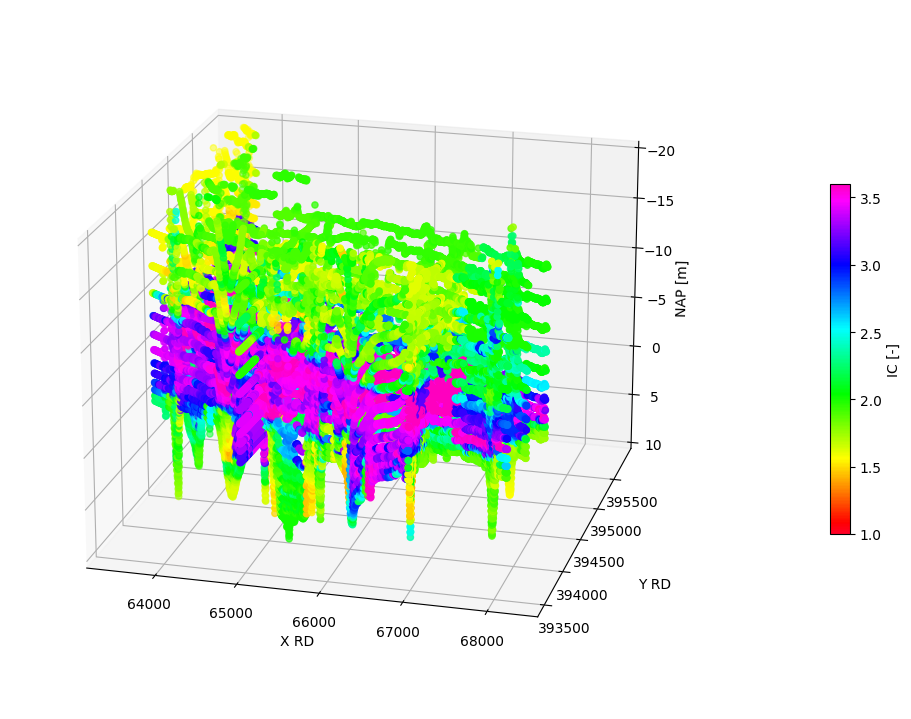

In [11]:
import matplotlib.pylab as plt

# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')    
ax.set_position([-0.12, 0.0, 1, 1])
ax.view_init(20, -75)

cmap = plt.get_cmap('gist_rainbow', 11) 

# plot data
im = ax.scatter(x, y, z, c=values['label_values'][1],
                vmin=1, vmax=3.6, cmap='gist_rainbow')

# axis labels
ax.set_xlabel("X RD", fontsize=10)
ax.set_ylabel("Y RD", labelpad=20, fontsize=10)
ax.set_zlabel("NAP [m]", fontsize=10)
ax.set_zlim(10, -20)

# legend
cax = plt.axes([0.85, 0.25, 0.02, 0.5])
cbar = plt.colorbar(im, cax=cax, fraction=0.1, pad=0.01)
cbar.set_label("IC [-]", fontsize=10)

## Initiate CesiumViewer

In [12]:
from datafusiontools.visualisation.cesium import CesiumViewer

In [13]:
viewer = CesiumViewer(result_folder='./data/', port=8080)

## Generate voxel 3D data from result

### Object in-memory (attached to CesiumViewer)

In [14]:
viewer.generate_voxel_tiles(xyz,dxdydz,values,0,'test_voxel_0','viridis')

In [15]:
viewer.voxel_tiles.__dict__

{'xyz': array([[ 6.35002333e+04,  3.95018832e+05,  1.47253631e+00],
        [ 6.35002333e+04,  3.95018832e+05,  9.72536315e-01],
        [ 6.35002333e+04,  3.95018832e+05,  3.72536315e-01],
        ...,
        [ 6.82479507e+04,  3.94244014e+05, -1.11055678e+01],
        [ 6.82479507e+04,  3.94244014e+05, -1.37055678e+01],
        [ 6.82479507e+04,  3.94244014e+05, -1.69055678e+01]]),
 'dxdydz': array([[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]]),
 'values': {'label_names': ['Resistivity', 'IC'],
  'label_values': [[24.88,
    25.23,
    25.06,
    23.49,
    19.69,
    14.13,
    8.184,
    3.951,
    1.996,
    1.404,
    1.322,
    1.438,
    1.528,
    7.418,
    6.695,
    5.066,
    3.222,
    1.909,
    1.414,
    1.495,
    1.575,
    1.5,
    1.399,
    1.391,
    1.487,
    1.628,
    0.9232,
    0.932,
    0.9628,
    0.9971,
    1.037,
    1.1,
    1.184,
    1.274

In [16]:
viewer.voxel_tiles.voxel_models_cesium

array([[TriangleMesh with 8 points and 12 triangles.,
        array([24.88      ,  2.16031941])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([25.23      ,  2.16031941])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([25.06     ,  2.1611611])],
       ...,
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.454     , 1.99518229])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.583     , 2.02969609])],
       [TriangleMesh with 8 points and 12 triangles.,
        array([1.691     , 1.99535515])]], dtype=object)

### Write b3dm tile on disk

In [22]:
viewer.voxel_tiles.write_tiles()

100%|██████████| 62051/62051 [00:10<00:00, 5805.01it/s]
62051it [00:02, 30551.67it/s]


AttributeError: 'TriangleSoup' object has no attribute 'get_position_array'

## Start Server attached to Cesium viewer for visualisation

In [ ]:
viewer.cesium_server.tiles_served 

In [ ]:
viewer.cesium_server.start_server()
print(viewer.cesium_server.url)

In [ ]:
viewer.cesium_server.tiles_url

In [ ]:
viewer.cesium_server.stop_server()